In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Machine Learning - Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All libraries imported successfully")


✓ All libraries imported successfully


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\lenov\OneDrive\Documents\GitHub Data Science Portfolio\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(f"Dataset Shape: {df.shape}")
print(f"Number of Customers: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")

Dataset Shape: (7043, 21)
Number of Customers: 7,043
Number of Features: 21


In [3]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total Missing Values: 0


In [7]:
# Visualize missing data
if df.isnull().sum().sum() > 0:
    msno.matrix(df, figsize=(12, 5))
    plt.title('Missing Data Visualization', fontsize=14)
    plt.show()
else:
    print("✓ No missing values in the dataset")

✓ No missing values in the dataset


In [8]:
# Create a copy for cleaning
df_clean = df.copy()

# Convert TotalCharges to numeric (it may contain spaces or non-numeric values)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check for any null values created
print(f"Null values in TotalCharges after conversion: {df_clean['TotalCharges'].isnull().sum()}")

# Handle null values if any
if df_clean['TotalCharges'].isnull().sum() > 0:
    # Fill with median or drop rows
    df_clean = df_clean.dropna(subset=['TotalCharges'])
    print(f"Rows after cleaning: {df_clean.shape[0]}")

Null values in TotalCharges after conversion: 11
Rows after cleaning: 7032


In [9]:
# Remove customerID as it's not useful for modeling
df_clean = df_clean.drop('customerID', axis=1)

print("✓ Data cleaning completed")
print(f"Final dataset shape: {df_clean.shape}")

✓ Data cleaning completed
Final dataset shape: (7032, 20)


Churn Distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


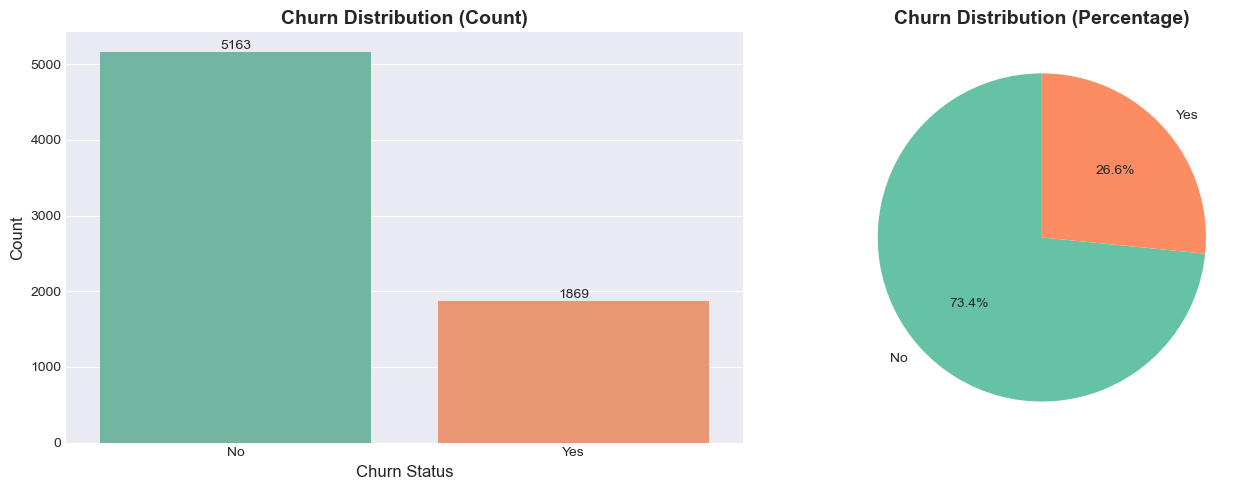

In [10]:
# Churn distribution
churn_counts = df_clean['Churn'].value_counts()
churn_pct = df_clean['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(churn_counts)
print("\nPercentage:")
print(churn_pct)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df_clean, x='Churn', ax=axes[0], palette='Set2')
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

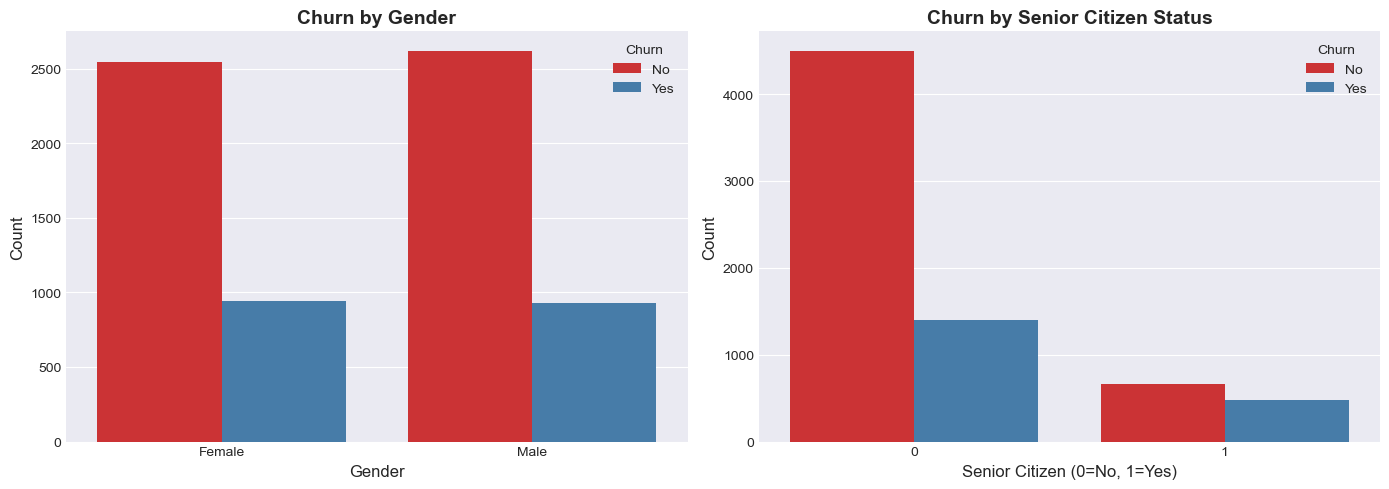

In [11]:
# Gender vs Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df_clean, x='gender', hue='Churn', ax=axes[0], palette='Set1')
axes[0].set_title('Churn by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Churn')

# Senior Citizen vs Churn
sns.countplot(data=df_clean, x='SeniorCitizen', hue='Churn', ax=axes[1], palette='Set1')
axes[1].set_title('Churn by Senior Citizen Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Senior Citizen (0=No, 1=Yes)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Churn')

plt.tight_layout()
plt.show()

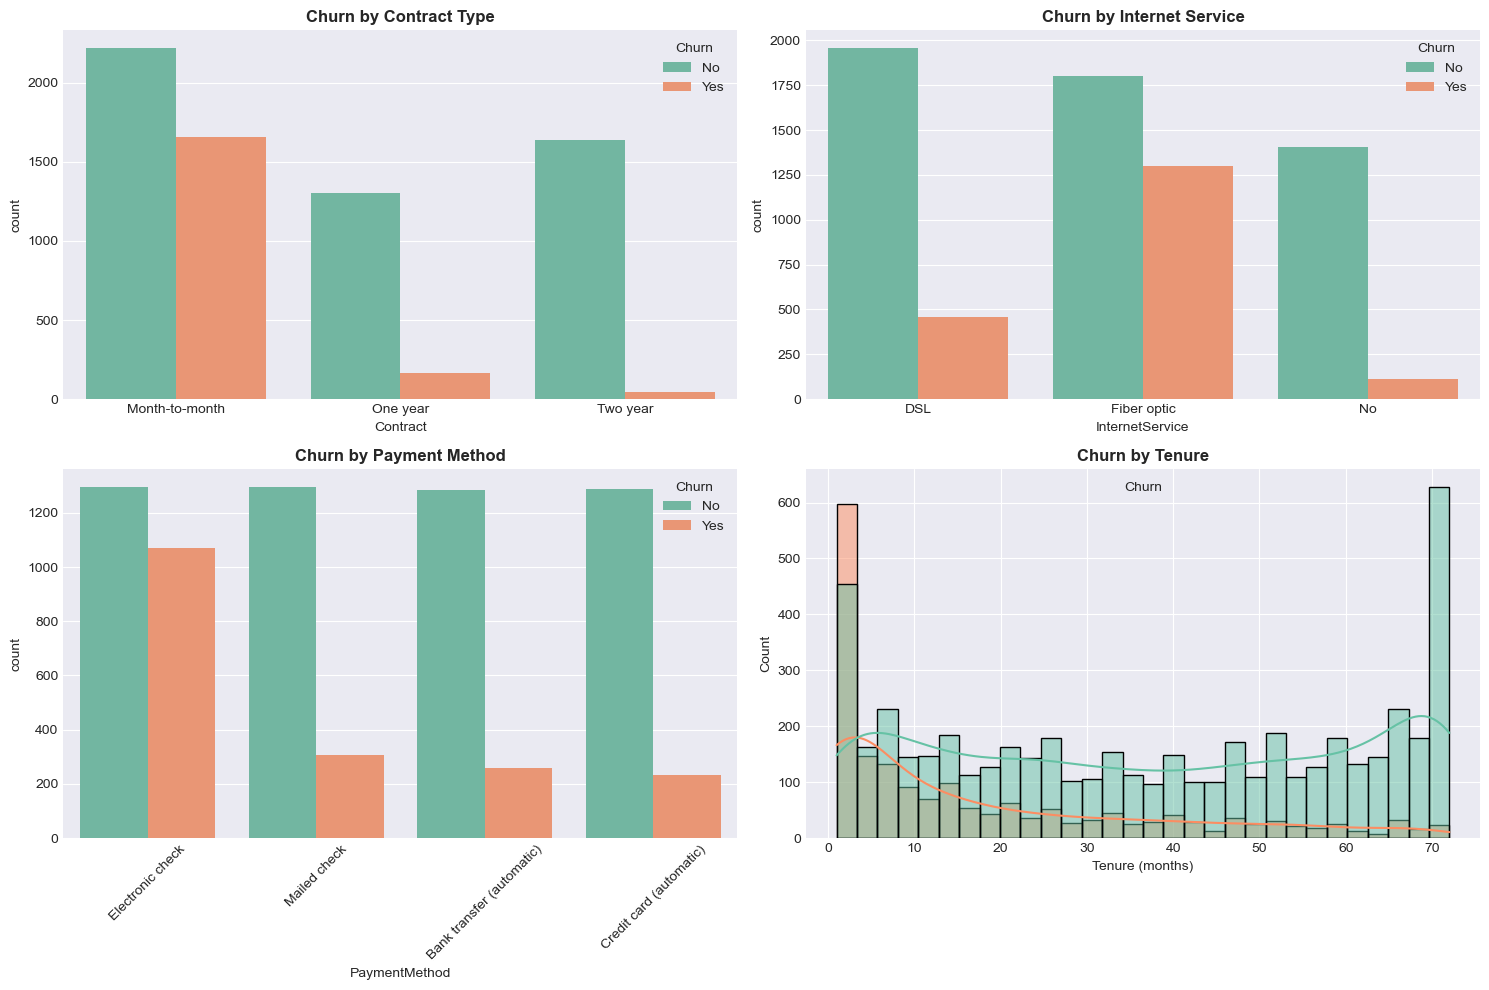

In [12]:
# Contract type vs Churn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Contract
sns.countplot(data=df_clean, x='Contract', hue='Churn', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Churn by Contract Type', fontsize=12, fontweight='bold')
axes[0, 0].legend(title='Churn')

# Internet Service
sns.countplot(data=df_clean, x='InternetService', hue='Churn', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Churn by Internet Service', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Churn')

# Payment Method
sns.countplot(data=df_clean, x='PaymentMethod', hue='Churn', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Churn by Payment Method', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Churn')

# Tenure
sns.histplot(data=df_clean, x='tenure', hue='Churn', bins=30, ax=axes[1, 1], palette='Set2', kde=True)
axes[1, 1].set_title('Churn by Tenure', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tenure (months)')
axes[1, 1].legend(title='Churn')

plt.tight_layout()
plt.show()

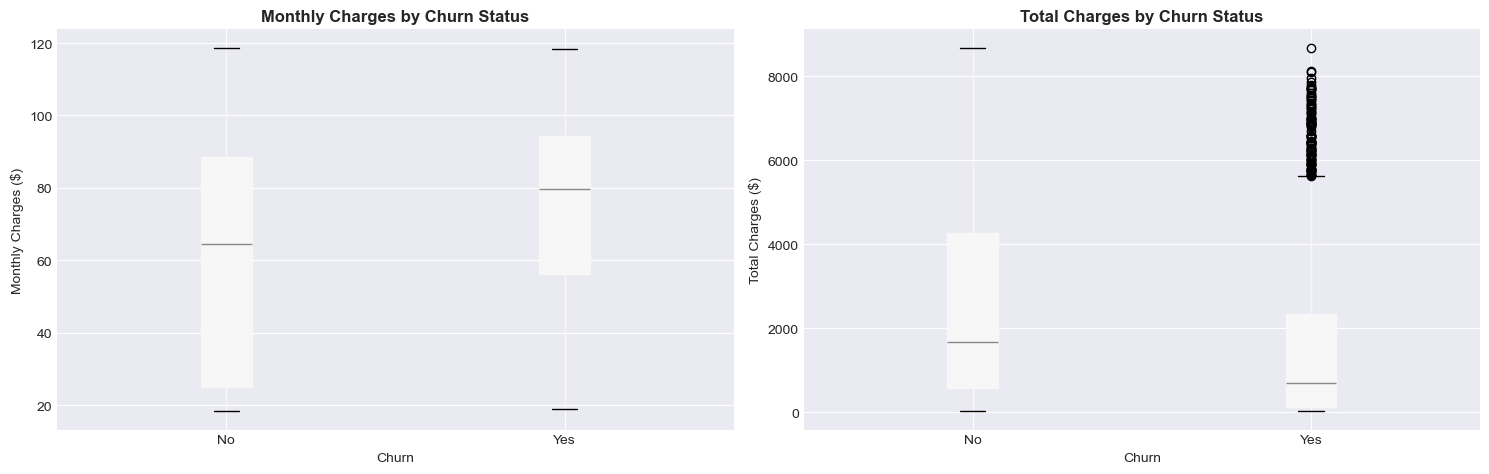

In [13]:
# Monthly and Total Charges analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Monthly Charges
df_clean.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0], patch_artist=True)
axes[0].set_title('Monthly Charges by Churn Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges ($)')
plt.sca(axes[0])
plt.xticks([1, 2], ['No', 'Yes'])

# Total Charges
df_clean.boxplot(column='TotalCharges', by='Churn', ax=axes[1], patch_artist=True)
axes[1].set_title('Total Charges by Churn Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total Charges ($)')
plt.sca(axes[1])
plt.xticks([1, 2], ['No', 'Yes'])

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

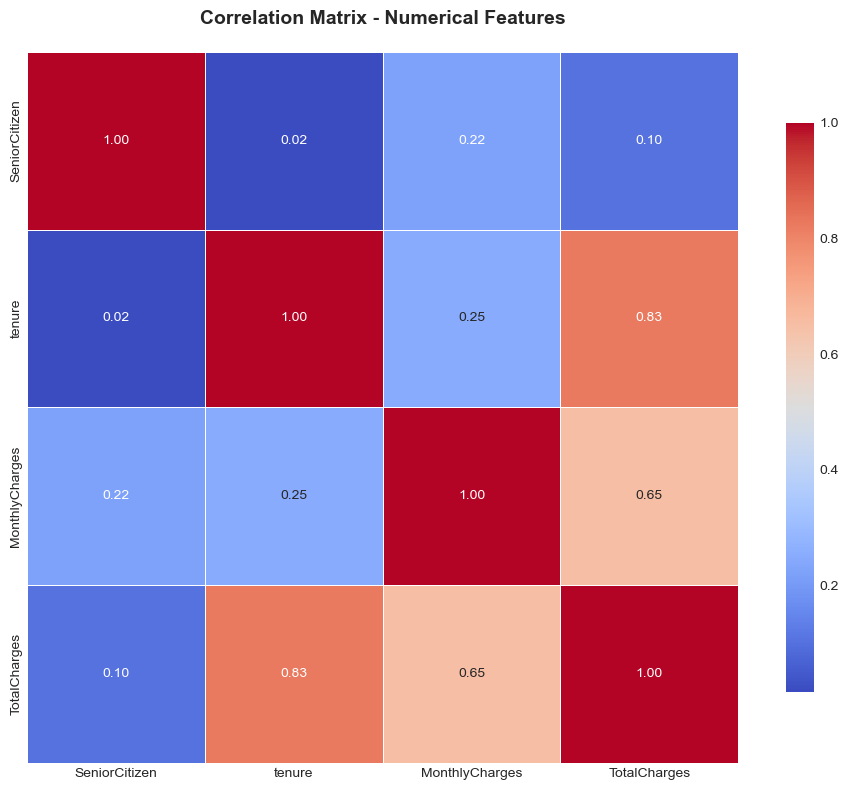

In [14]:
# Correlation matrix for numerical features
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [15]:
# Create a copy for preprocessing
df_processed = df_clean.copy()

# Encode binary categorical variables (Yes/No)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

# Encode target variable
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

# Encode gender
df_processed['gender'] = df_processed['gender'].map({'Male': 1, 'Female': 0})

print("✓ Binary encoding completed")

✓ Binary encoding completed


In [16]:
# One-hot encode multi-class categorical variables
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaymentMethod']

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("✓ One-hot encoding completed")
print(f"New dataset shape: {df_processed.shape}")

✓ One-hot encoding completed
New dataset shape: (7032, 31)


In [17]:
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Feature scaling completed")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nChurn distribution in target:")
print(y.value_counts())

Feature scaling completed

Feature matrix shape: (7032, 30)
Target vector shape: (7032,)

Churn distribution in target:
Churn
0    5163
1    1869
Name: count, dtype: int64


In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain set churn distribution:")
print(y_train.value_counts())
print(f"\nTest set churn distribution:")
print(y_test.value_counts())

Data Split:
Training set: 4922 samples
Test set: 2110 samples

Train set churn distribution:
Churn
0    3614
1    1308
Name: count, dtype: int64

Test set churn distribution:
Churn
0    1549
1     561
Name: count, dtype: int64


In [19]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train model and return evaluation metrics
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC AUC if probability predictions available
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print(f"\n{'='*60}")
    print(f"{model_name} Results")
    print(f"{'='*60}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"ROC AUC:   {roc_auc:.4f}")
    
    return {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

def plot_confusion_matrix(y_test, y_pred, model_name):
    """
    Plot confusion matrix for model predictions
    """
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                linewidths=2, linecolor='black')
    plt.title(f'{model_name} - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_test, y_pred_proba, model_name):
    """
    Plot ROC curve for model
    """
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'{model_name} - ROC Curve', fontsize=14, fontweight='bold')
        plt.legend(loc='lower right', fontsize=10)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

print("Evaluation functions defined")

Evaluation functions defined



Logistic Regression Results
Accuracy:  0.8057
Precision: 0.6557
Recall:    0.5668
F1-Score:  0.6080
ROC AUC:   0.8379


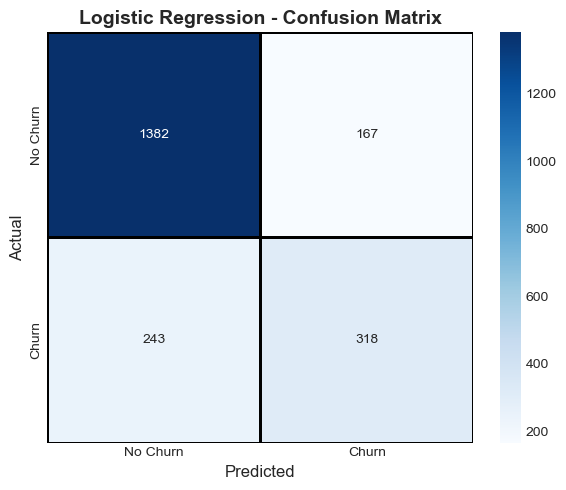

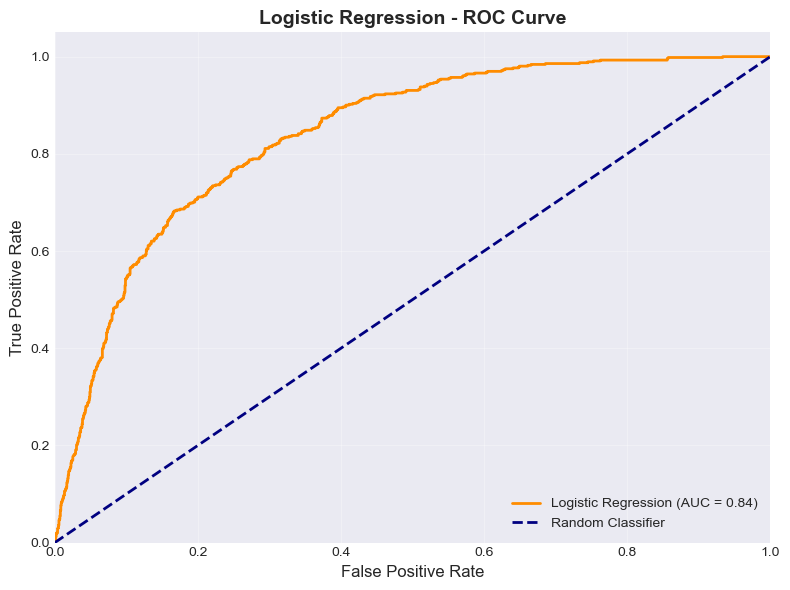

In [20]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_results = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")

# Visualization
plot_confusion_matrix(y_test, lr_results['predictions'], "Logistic Regression")
plot_roc_curve(y_test, lr_results['probabilities'], "Logistic Regression")


K-Nearest Neighbors Results
Accuracy:  0.7611
Precision: 0.5496
Recall:    0.5633
F1-Score:  0.5563
ROC AUC:   0.7814


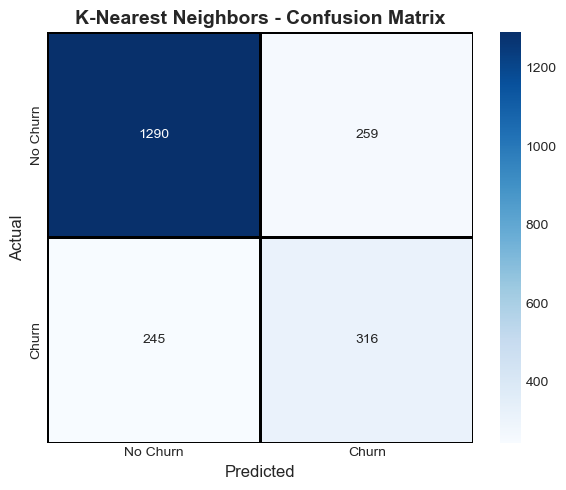

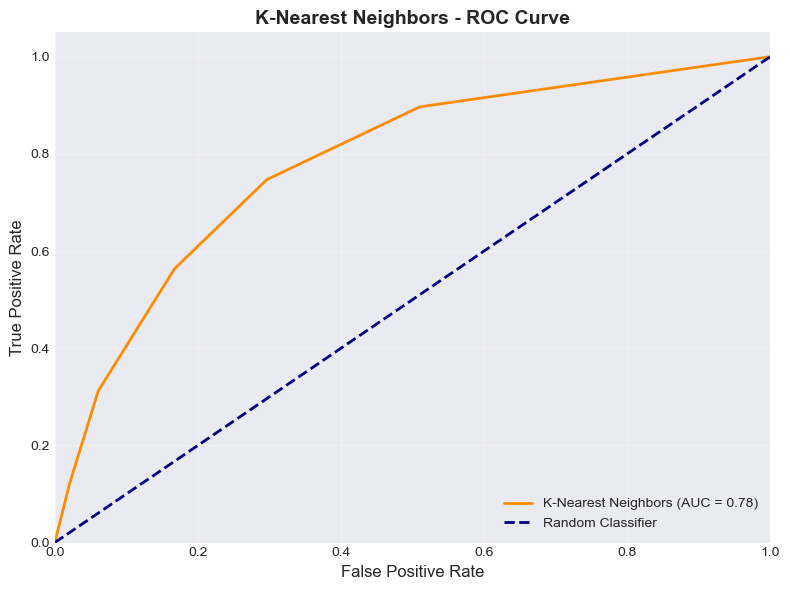

In [21]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

# Visualization
plot_confusion_matrix(y_test, knn_results['predictions'], "K-Nearest Neighbors")
plot_roc_curve(y_test, knn_results['probabilities'], "K-Nearest Neighbors")


Support Vector Classifier Results
Accuracy:  0.7953
Precision: 0.6617
Recall:    0.4706
F1-Score:  0.5500
ROC AUC:   0.7925


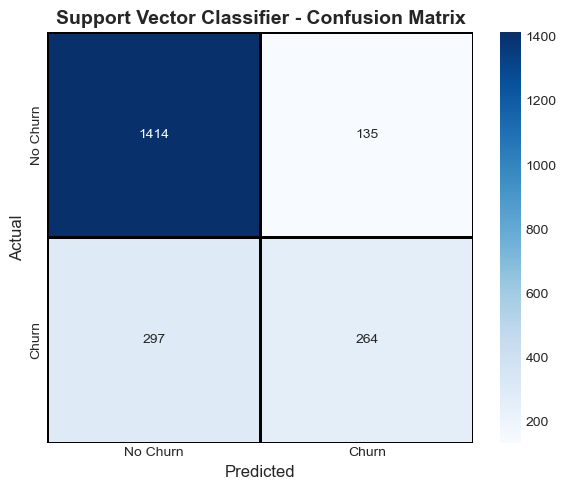

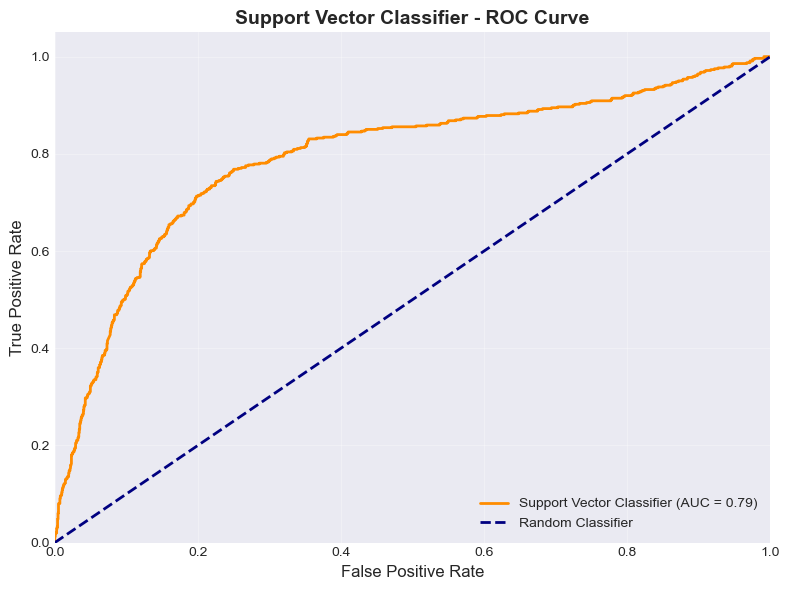

In [22]:
# Support Vector Classifier
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_results = evaluate_model(svc_model, X_train, X_test, y_train, y_test, "Support Vector Classifier")

# Visualization
plot_confusion_matrix(y_test, svc_results['predictions'], "Support Vector Classifier")
plot_roc_curve(y_test, svc_results['probabilities'], "Support Vector Classifier")


Decision Tree Results
Accuracy:  0.7730
Precision: 0.5737
Recall:    0.5686
F1-Score:  0.5712
ROC AUC:   0.8144


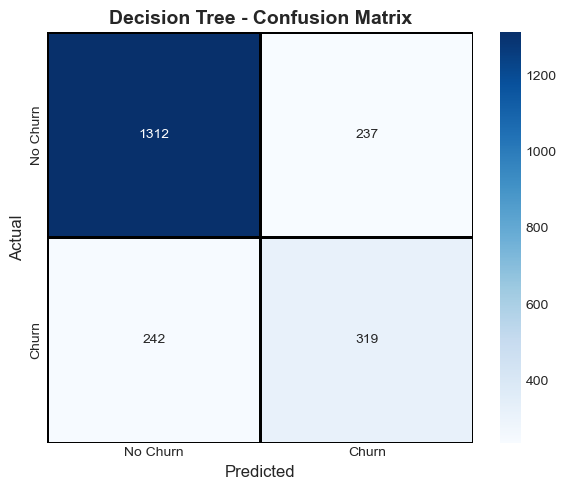

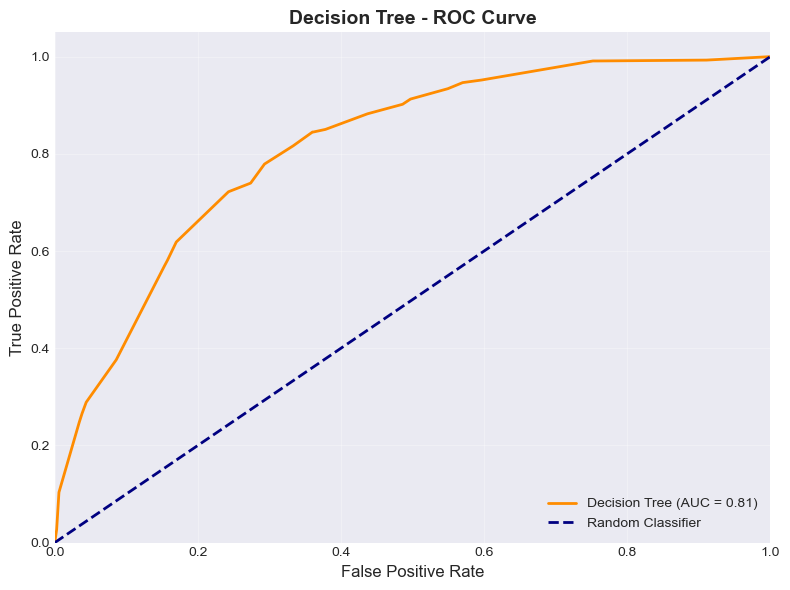

In [23]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

# Visualization
plot_confusion_matrix(y_test, dt_results['predictions'], "Decision Tree")
plot_roc_curve(y_test, dt_results['probabilities'], "Decision Tree")


Random Forest Results
Accuracy:  0.7924
Precision: 0.6482
Recall:    0.4795
F1-Score:  0.5512
ROC AUC:   0.8330


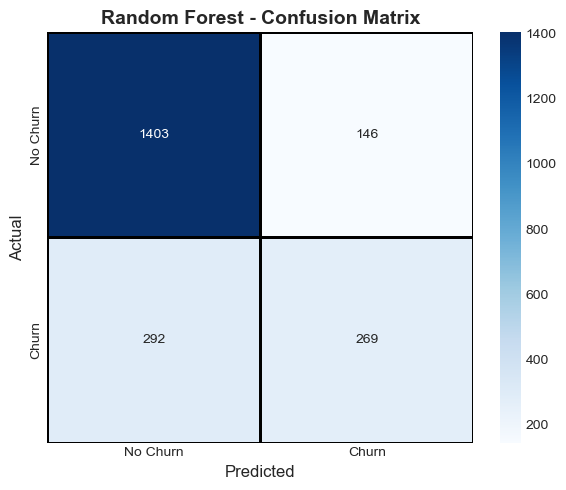

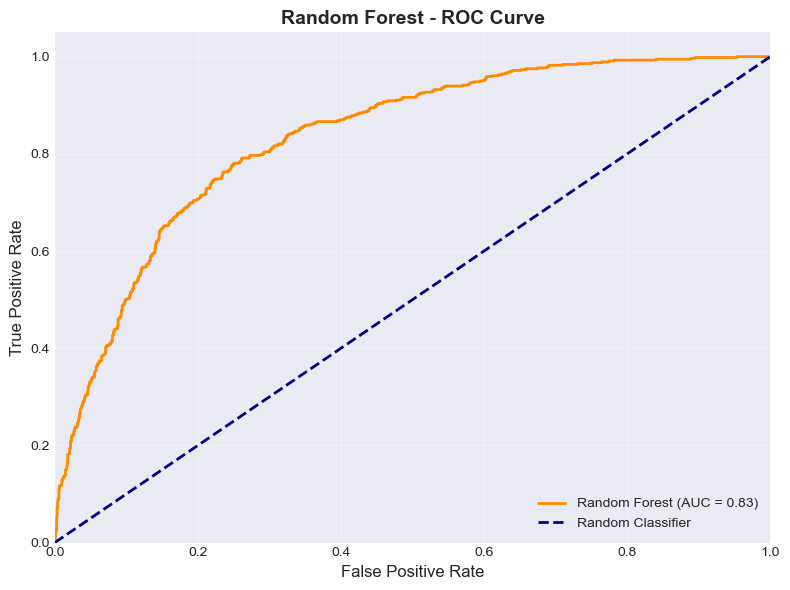

In [24]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Visualization
plot_confusion_matrix(y_test, rf_results['predictions'], "Random Forest")
plot_roc_curve(y_test, rf_results['probabilities'], "Random Forest")


XGBoost Results
Accuracy:  0.7839
Precision: 0.6115
Recall:    0.5134
F1-Score:  0.5581
ROC AUC:   0.8101


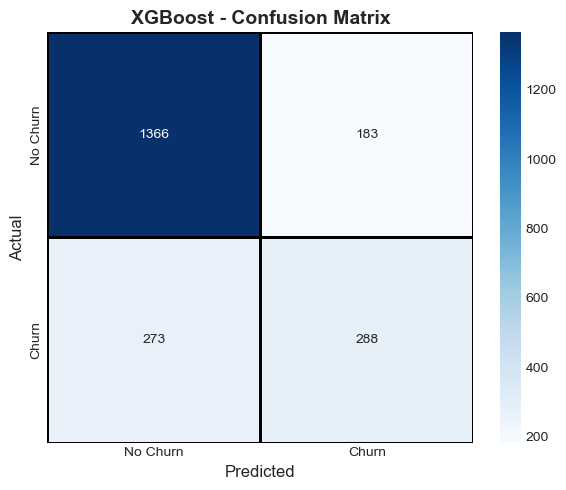

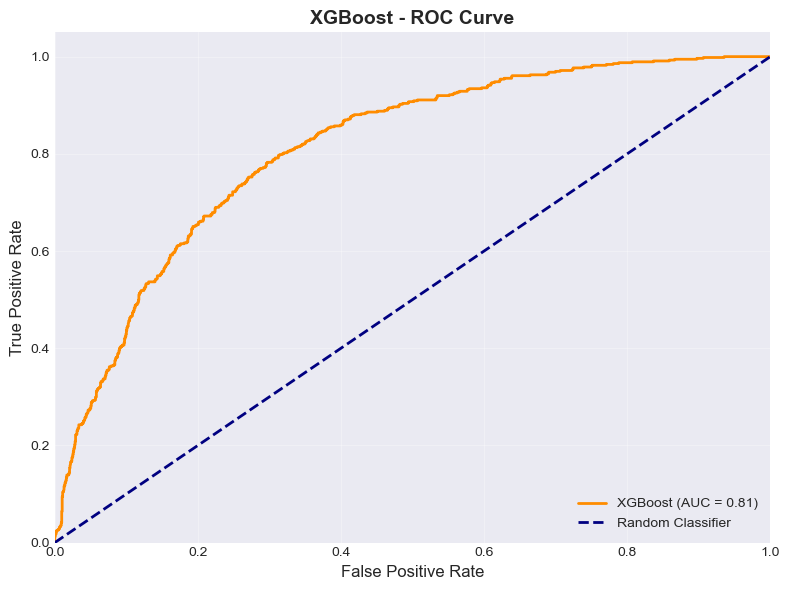

In [25]:
# XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_results = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Visualization
plot_confusion_matrix(y_test, xgb_results['predictions'], "XGBoost")
plot_roc_curve(y_test, xgb_results['probabilities'], "XGBoost")

In [26]:
# Compile results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 
              'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_results['accuracy'], knn_results['accuracy'], svc_results['accuracy'],
                dt_results['accuracy'], rf_results['accuracy'], xgb_results['accuracy']],
    'Precision': [lr_results['precision'], knn_results['precision'], svc_results['precision'],
                 dt_results['precision'], rf_results['precision'], xgb_results['precision']],
    'Recall': [lr_results['recall'], knn_results['recall'], svc_results['recall'],
              dt_results['recall'], rf_results['recall'], xgb_results['recall']],
    'F1-Score': [lr_results['f1'], knn_results['f1'], svc_results['f1'],
                dt_results['f1'], rf_results['f1'], xgb_results['f1']],
    'ROC AUC': [lr_results['roc_auc'], knn_results['roc_auc'], svc_results['roc_auc'],
               dt_results['roc_auc'], rf_results['roc_auc'], xgb_results['roc_auc']]
})

# Sort by F1-Score
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)


MODEL COMPARISON SUMMARY
                    Model  Accuracy  Precision   Recall  F1-Score  ROC AUC
      Logistic Regression  0.805687   0.655670 0.566845  0.608031 0.837895
            Decision Tree  0.772986   0.573741 0.568627  0.571173 0.814380
                  XGBoost  0.783886   0.611465 0.513369  0.558140 0.810070
      K-Nearest Neighbors  0.761137   0.549565 0.563280  0.556338 0.781376
            Random Forest  0.792417   0.648193 0.479501  0.551230 0.833037
Support Vector Classifier  0.795261   0.661654 0.470588  0.550000 0.792484


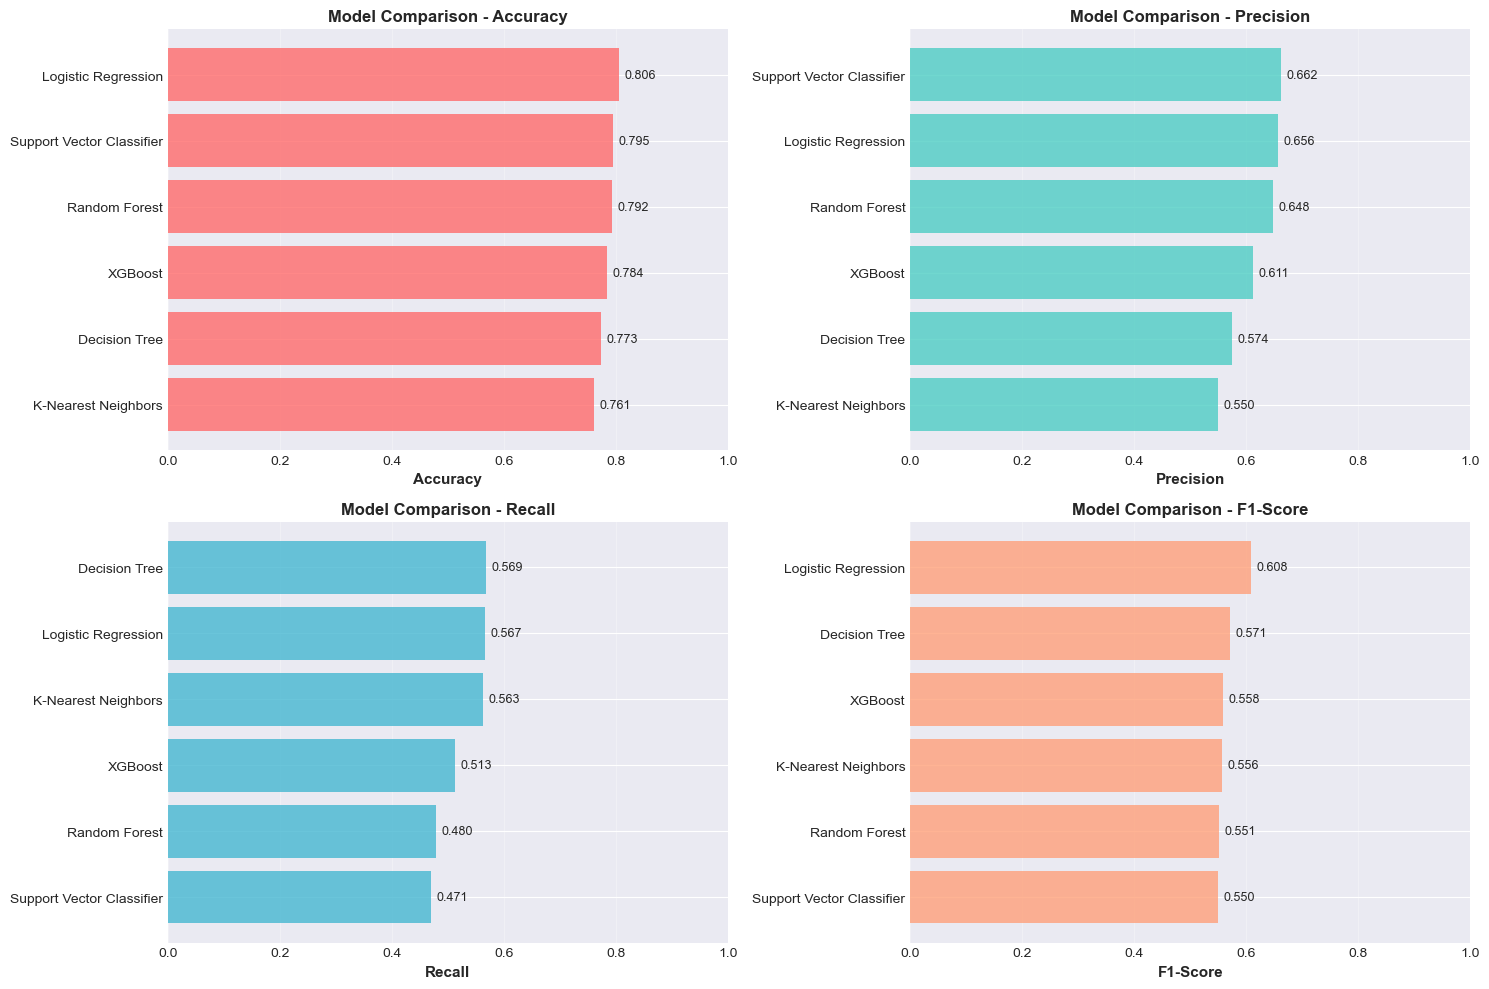

In [27]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    results_sorted = results_df.sort_values(metric, ascending=True)
    ax.barh(results_sorted['Model'], results_sorted[metric], color=color, alpha=0.8)
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'Model Comparison - {metric}', fontsize=12, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(results_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

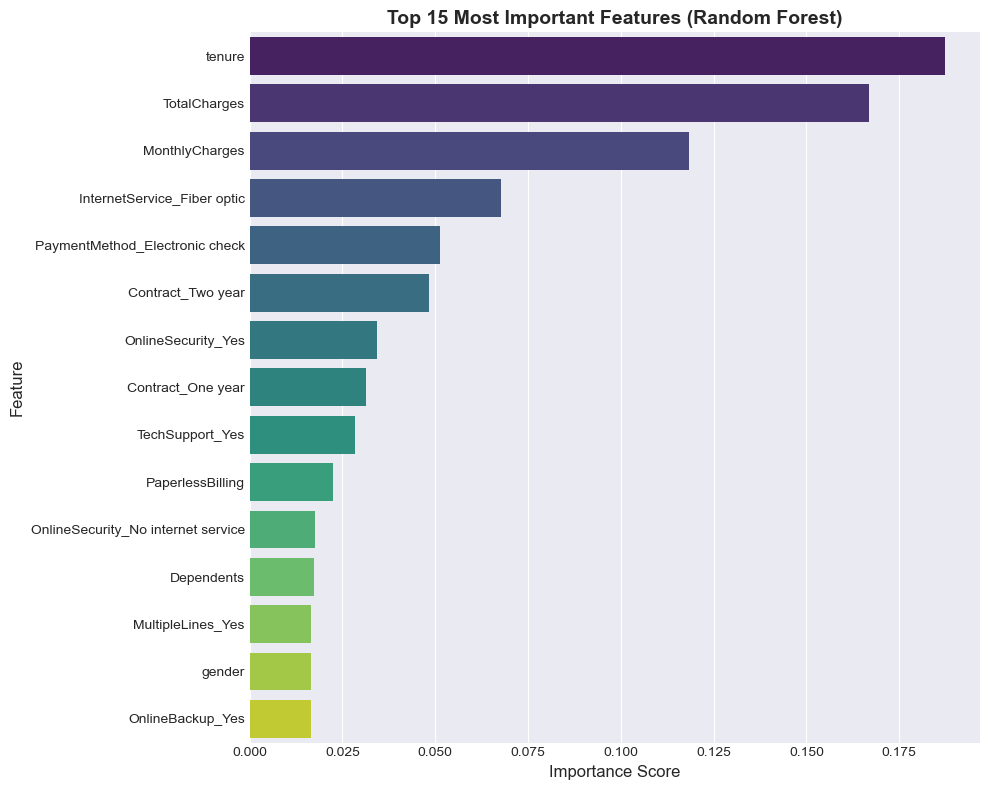


Top 10 Most Important Features:
                       Feature  Importance
                        tenure    0.187405
                  TotalCharges    0.166961
                MonthlyCharges    0.118351
   InternetService_Fiber optic    0.067672
PaymentMethod_Electronic check    0.051400
             Contract_Two year    0.048374
            OnlineSecurity_Yes    0.034343
             Contract_One year    0.031338
               TechSupport_Yes    0.028395
              PaperlessBilling    0.022466


In [28]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))